Of course the first in any kind of data evaluation is loading data. To make this harder, every spectrometer vendor creates their own file format - which often lack a public documentation. In this case the last resort to get files into python is often to export them to a text file. `numpy` comes with a few functions that read files into arrays. 

First, let's get some test data.

In [1]:
from spectroscopy_data.pretreatment import loading_data

load_dir, csv_path = loading_data()


import os

These files consist of two columns of data, the first one being the wavenumber axis and the second one the intensity values. The data looks as follows:

    1.000000000000000000e+03;0.000000000000000000e+00
    1.020408163265306143e+03;0.000000000000000000e+00
    1.040816326530612287e+03;0.000000000000000000e+00
    1.061224489795918316e+03;0.000000000000000000e+00
    1.081632653061224573e+03;0.000000000000000000e+00
    1.102040816326530603e+03;0.000000000000000000e+00
    1.122448979591836633e+03;0.000000000000000000e+00

and so on.

The filenames look  "measurement_series 0.csv" to "measurement_series 99.csv". The main function to load such comma separated files into numpy arrays is `np.genfromtxt`. It's first input is either the path to the file we want to load or its contents as a string.

It has a few options to make sure the file is loaded correctly. The most important ones probably are those for skipping the first few rows `skiprows` and the option to state select the column separator character.

The column separator in files for this exercise is `;`.
    


In [2]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib notebook

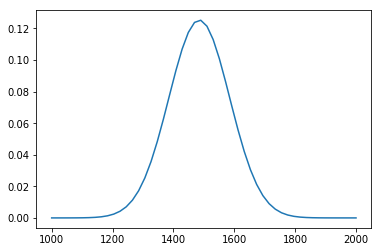

In [3]:
first_file_path = os.path.join(csv_path, "measurement_series 0.csv")


data = np.genfromtxt(first_file_path, delimiter=";")

plt.figure()
plt.plot(data[:,0], data[:,1])

In the case of column wise data, it can also make sense to use the `unpack` option as well. It transposes the loaded data, so that columns are the first index of the array:

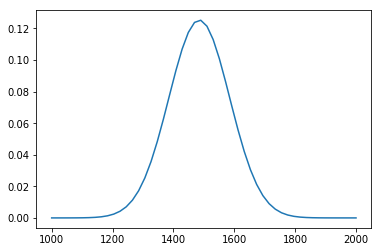

In [4]:
first_file_path = os.path.join(csv_path, "measurement_series 0.csv")


data = np.genfromtxt(first_file_path, delimiter=";", unpack=True)

plt.figure()
plt.plot(data[0], data[1])

The folder with raw data contains 100 files in total. It would be tedious to load all of them by hand. If we know what the files are called like, we can of course load them in a loop, like so:

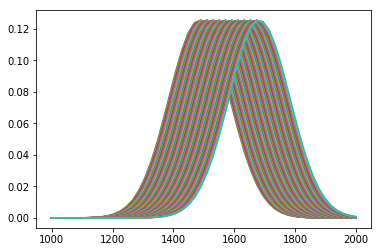

In [5]:
generic_file_path = os.path.join(csv_path, "measurement_series {}.csv")

all_data = []

for file_idx in range(100):
    data = np.genfromtxt(generic_file_path.format(file_idx),
                         delimiter=";",
                         unpack=True)
    all_data.append(data)

plt.figure()
for data in all_data:
    plt.plot(data[0], data[1])


Of course, not always is there a straight forward way in which 